## Общая информация
### Название: исследование гипотез для развития сервиса аренды самокатов GoFast
### Описание проекта
Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

   * без подписки
      * абонентская плата отсутствует;
      * стоимость одной минуты поездки — 8 рублей;
      * стоимость старта (начала поездки) — 50 рублей;  
  
  
   * с подпиской Ultra
      * абонентская плата — 199 рублей в месяц;
      * стоимость одной минуты поездки — 6 рублей;
      * стоимость старта — бесплатно.

### Описание данных
В основных данных есть информация о пользователях, их поездках и подписках.

   * Пользователи — users_go.csv
      * `user_id`	уникальный идентификатор пользователя
      * `name`	имя пользователя
      * `age`	возраст
      * `city`	город
      * `subscription_type`	тип подписки (free, ultra)
      
      
   * Поездки — rides_go.csv
      * `user_id`	уникальный идентификатор пользователя
      * `distance`	расстояние, которое пользователь проехал в текущей сессии (в метрах)
      * `duration`	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
      * `date`	дата совершения поездки


   * Подписки — subscriptions_go.csv
      * `subscription_type`	тип подписки
      * `minute_price`	стоимость одной минуты поездки по данной подписке
      * `start_ride_price`	стоимость начала поездки
      * `subscription_fee`	стоимость ежемесячного платежа

<a id='lab001'></a>
### План работ
   * [Общее знакомство с данными](#lab003)
   * [Предобработка данных](#lab004)
      * Изменение типа столбцов
      * Устранение явных дубликатов
      * Поиск неявных дубликатов
      * Создание нового столбеца с номером месяца
      * Поиск пользователей, сминивших тип подписки во время исследования
      * [Предварительные итоги](#lab26)
   * [Исследовательский анализ данных](#lab05)
      * [частота встречаемости городов](#lab06)
      * [соотношение пользователей с подпиской и без подписки](#lab07)
      * [возраст пользователей](#lab08)
      * [расстояние, которое пользователь преодолел за одну поездку](#lab09)
      * [продолжительность поездок](#lab10)
      * [Предварительные итоги](#lab27)
   * [Объединение данных](#lab11)
      * [объединение данных о пользователях, поездках и подписках в один датафрейм](#lab12)
      * [Разделение данных на два датафрейма на пользователей с подпиской и без](#lab13)
      * [Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий](#lab14)
      * [Предварительные итоги](#lab28)
   * [Подсчет выручки](#lab15)
      * [Создание сводной таблицы по пользователям](#lab16)
      * [Добавление помесячной выручки в сводную таблицу](#lab17)
      * [Предварительные итоги](#lab29)
   * [Проверка гипотез](#lab18)
      * [Гипотеза: пользователи с подпиской тратят больше времени на поездки](#lab19)
      * [Гипотеза: пользователи с подпиской проезжают в среднем не больше 3130 метров](#lab20)
      * [Гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки](#lab21)
      * [Снижение количества обращений в техподдержку при потенциальном обновлении сервера](#lab22)
      * [Предварительные итоги](#lab30)
   * [Распределения](#lab23)
      * [Акция с промокодами](#lab24)
      * [Акция с push-уведомлениями](#lab25)
      * [Предварительные итоги](#lab31)
   * [Общие итоги](#lab32)

<a id='lab003'></a>
#### Общее знакомство с данными
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub>

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from matplotlib.gridspec import GridSpec


#### Шаг 1. Загрузка данных
Загрузим данные и проведем первичное знакомство с ними

In [2]:
df=pd.Series(dtype = 'object')

try:
    df['users'] = pd.read_csv('/datasets/users_go.csv')
except:
    df['users'] = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
    
try:
    df['riders'] = pd.read_csv('/datasets/rides_go.csv', parse_dates=['date'])
except:
    df['riders'] = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv', parse_dates=['date'])

try:
    df['subscriptions'] = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    df['subscriptions'] = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
df.riders.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
df.subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [6]:
df.users.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 412.6 KB


In [7]:
df.riders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


* Тарификация поминутная, поэтому стоит изменить тип слолбца `продолжительность сессии` на целый, с округлением в большую сторону
* `Дистанцию, которую преодолел пользователь`, тоже можно перевести в целый тип, т.к. оставшейся точности с запасом хватит для исследования.

In [8]:
df.subscriptions.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 299.0 bytes


**Данные загрузились корректно, требуемый объем памяти минимальный. Для 2 столбцов имеет смысл изменить тип данных. Пропусков нет.**

<a id='lab004'></a>
### Шаг 2. Предобработка данных
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub>
#### Изменение типа столбцов

In [9]:
for column in ['distance', 'duration']:
    df.riders[column] = np.ceil(df.riders[column])
    df.riders[column] = df.riders[column].astype('int')
df.riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  int64         
 2   duration  18068 non-null  int64         
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 564.8 KB


**Для 2 столбцов был изменен тип данных.**

#### Устранение явных дубликатов

In [10]:
for i in df.keys():
    tmp = df[i].duplicated().sum()
    if tmp > 0:
        df[i] = df[i].drop_duplicates()
        display(f'В базе {i} обнаружено {tmp} явных дубликатов, которые были устранены.')

'В базе users обнаружено 31 явных дубликатов, которые были устранены.'

**Была устранена 31 строка с явными дубликатами.**

##### Поиск неявных дубликатов
Проверим столбец `город` в базе `пользователи`:

In [11]:
df.users.city.unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

**Неявные дубликаты не обнаружены.**

##### Создание нового столбеца с номером месяца

In [12]:
df.riders['month'] =df.riders.date.dt.month
df.riders.head()

,user_id,distance,duration,date,month
0,1,4410,26,2021-01-01,1
1,1,2618,16,2021-01-18,1
2,1,755,7,2021-04-20,4
3,1,2695,19,2021-08-11,8
4,1,4029,27,2021-08-28,8


##### Поиск пользователей, сминивших тип подписки во время исследования

In [13]:
df.users[['user_id','subscription_type']].duplicated().sum()

0

In [14]:
subs_count = df.users.groupby('user_id')['subscription_type'].nunique() # группируем по идентификатору и считаем количество подписок

In [15]:
subs_count[subs_count > 1] # выводим пользователей, у который количество подписок больше 1

Series([], Name: subscription_type, dtype: int64)

##### Имена пользователей
Есть неявные дубликаты в столбце с именами пользователей, но в рамках этого исследования эта информация использоваться не будет.

<a id='lab26'></a>
#### Предварительные итоги
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub> 

* Пропусков в данных не было.
* Для 2 столбцов был изменен тип данных.
* Был создан новый столбец с номером месяца
* Была устранена 31 строка с явными дубликатами.
* В значимых столбцах неявных дубликатов не обнаружено.
* Есть неявные дубликаты в столбце с именами пользователей, но это поле не значимо для текущего исследования.
* За исследуемый период пользователи не меняли тип подписки

<a id='lab05'></a>
### Шаг 3. Исследовательский анализ данных
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub>
<a id='lab06'></a>
#### частота встречаемости городов
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub>  

*Опишите и визуализируйте общую информацию о частоте встречаемости городов*

In [16]:
city_pt = df.users.pivot_table(index = ['city'], columns = ['subscription_type'],
    values = ['user_id'], aggfunc=['count']).sort_values(('count', 'user_id', 'ultra'), ascending=False)
city_pt.columns = ['free', 'ultra']
city_pt

,free,ultra
city,,
Пятигорск,125,94
Екатеринбург,112,92
Омск,92,91
Ростов-на-Дону,109,89
Сочи,103,86
Москва,84,84
Тюмень,98,82
Краснодар,112,81


<AxesSubplot:title={'center':'Частота встречаемости городов среди пользователей'}, ylabel='Количество пользователей'>

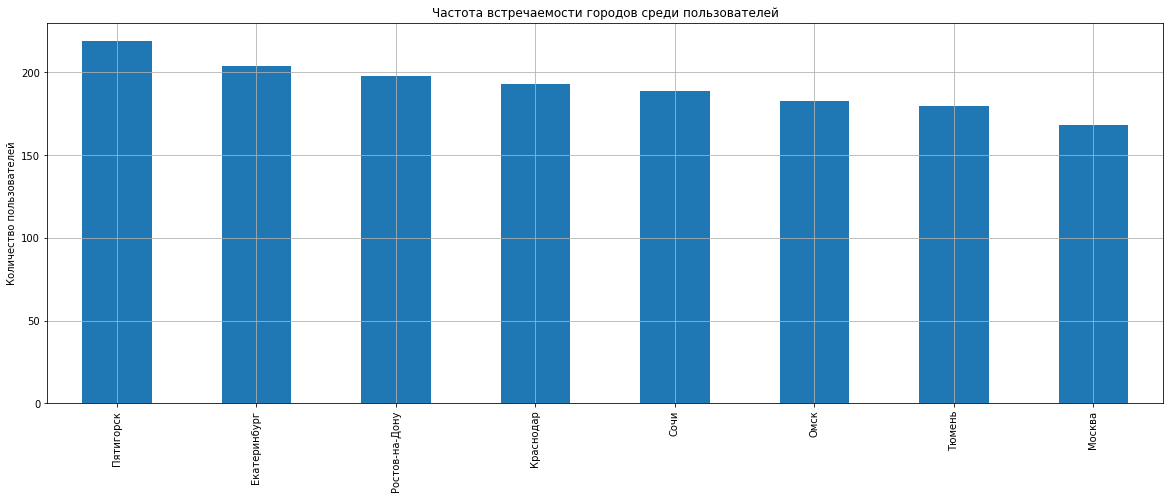

In [18]:
df.users.city.value_counts().plot.bar(figsize=(20, 7), grid = True, ylabel='Количество пользователей',
    title='Частота встречаемости городов среди пользователей')

In [19]:
df.users.city.value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

**Количество пользователей распределено по городам довольно равномерно, и находится в пределах от  169 до 219 пользователей.**

<a id='lab07'></a>
#### соотношение пользователей с подпиской и без подписки
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub>  

*Опишите и визуализируйте общую информацию о соотношение пользователей с подпиской и без подписки*

In [20]:
city_pt['prop'] = round(city_pt.ultra / (city_pt.free + city_pt.ultra),3)
city_pt.applymap(lambda x: x if type(x) == int else f'{x:.1%}')

,free,ultra,prop
city,,,
Пятигорск,125,94,42.9%
Екатеринбург,112,92,45.1%
Омск,92,91,49.7%
Ростов-на-Дону,109,89,44.9%
Сочи,103,86,45.5%
Москва,84,84,50.0%
Тюмень,98,82,45.6%
Краснодар,112,81,42.0%


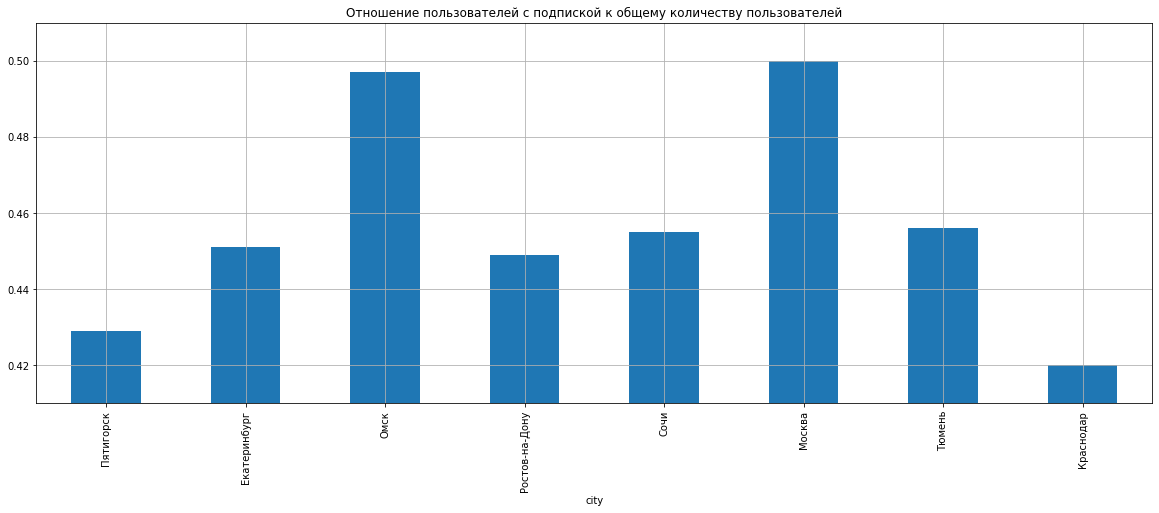

In [21]:
# ax = city_pt.prop.plot.bar(figsize=(20, 7), grid = True,
#     title='Отношение пользователей с подпиской к общему количеству пользователей')
# dev_null = ax.set_ylim(0.41, 0.51)

Посчитаем соотношение целом, по всей выборке:

In [23]:
df.users.subscription_type.value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

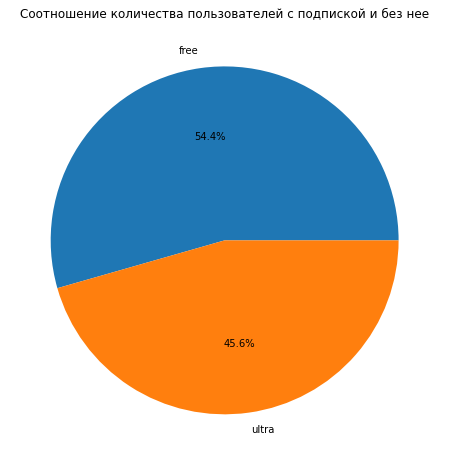

In [24]:
dev_null = df.users.subscription_type.value_counts().plot.pie(figsize=(8, 8), grid = True, autopct='%.1f%%',
    title='Соотношение количества пользователей с подпиской и без нее', ylabel='')

**Соотношение пользователей с подпиской к общему количеству пользователей приблизительно равно во всех городах, и держится на уровне 46% с отклонениями в несколько процентов**

<a id='lab08'></a>
#### возраст пользователей
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub> 

*Опишите и визуализируйте общую информацию о возрасте пользователей*

Посмотрим общую информацию о распределении по возрастам.

In [25]:
df.users.age.describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Ожидается, что распределение по возрастам должно быть с нормальным распределением. Отрисуем гистограмму, и для сравнения наложим на нее нормальное распределение со средним значением и отклонением, взятым из предыдущего пункта.

Text(0, 0.5, 'возраст пользователей')

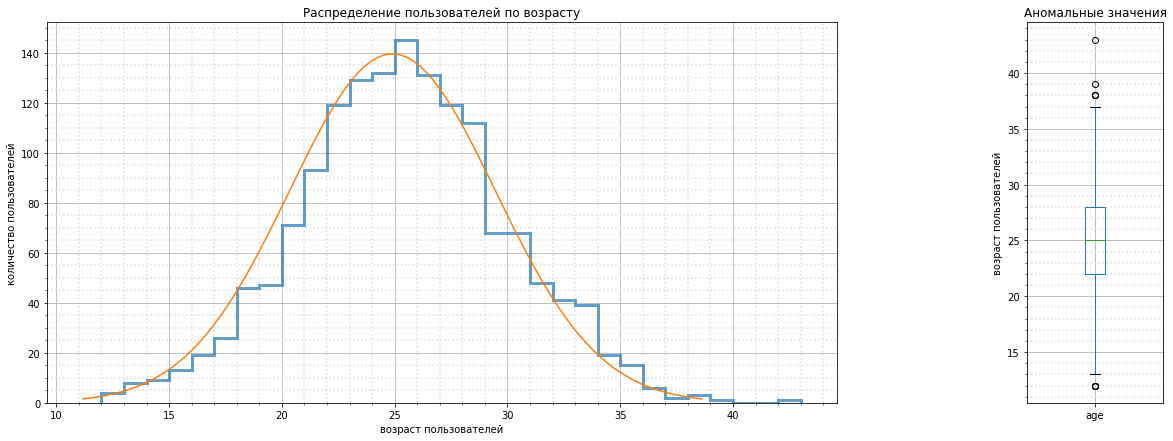

In [26]:
figure = plt.figure(figsize=(20, 7))
grid = GridSpec(1, 7)
figure.add_subplot(grid[0, 0:5])
figure.add_subplot(grid[0, 6])
    
ax = df.users.age.plot( kind='hist', histtype='step', linewidth=3, alpha=0.7, grid=True, bins=31,
    ax=figure.axes[0], title='Распределение пользователей по возрасту')
ax.minorticks_on()
ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=1.5)
ax.set_xlabel('возраст пользователей')
ax.set_ylabel('количество пользователей')

mu, sigma = df.users.age.mean(), df.users.age.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax = figure.axes[0].plot(x, 1600 * stats.norm.pdf(x, mu, sigma))
    
ax = df.users.age.plot(kind='box', title='Аномальные значения', grid=True, ax = figure.axes[1])
ax.minorticks_on()
ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=1.5)
ax.set_ylabel('возраст пользователей')


**Возраст пользователей хорошо апроксимируется нормальным распределением со средним 24.9 лет и стандартным отклонением 4.57. За пределами доверительного интервала есть несколько выбросов, которые не повлияют на дальнейшие исследования.**

<a id='lab09'></a>
#### расстояние, которое пользователь преодолел за одну поездку
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub> 

*Опишите и визуализируйте общую информацию о расстоянии, которое пользователь преодолел за одну поездку*

Создадим фильтры по городам и типу подписок:

In [27]:
filtr={}
for i in df.users.city.unique():
    filtr['city_'+i] = df.riders.user_id.isin(df.users[df.users.city == i]['user_id'].values)
filtr['full']=df.riders.user_id.apply(lambda x: True)
for i in df.users.subscription_type.unique():
    filtr['subscription_type_'+i] = df.riders.user_id.isin(df.
        users[df.users.subscription_type == i]['user_id'].values)

Посмотрим, количество элементов в базе с поездками, при каждом фильтре:

In [28]:
for i in filtr: display(f'{i}: {filtr[i].sum()}')

'city_Тюмень: 2121'

'city_Омск: 2077'

'city_Москва: 1875'

'city_Ростов-на-Дону: 2450'

'city_Краснодар: 2301'

'city_Пятигорск: 2524'

'city_Екатеринбург: 2461'

'city_Сочи: 2259'

'full: 18068'

'subscription_type_ultra: 6500'

'subscription_type_free: 11568'

А вот тут сюрприз: количество поездок с подпиской почти в 2 раза меньше, чем без подписки. Хотя, казалось бы, должно быть наоборот.

Посмотрим распределение по расстоянию общее и в различных разрезах.

Text(300, 250, 'подозрительный пик')

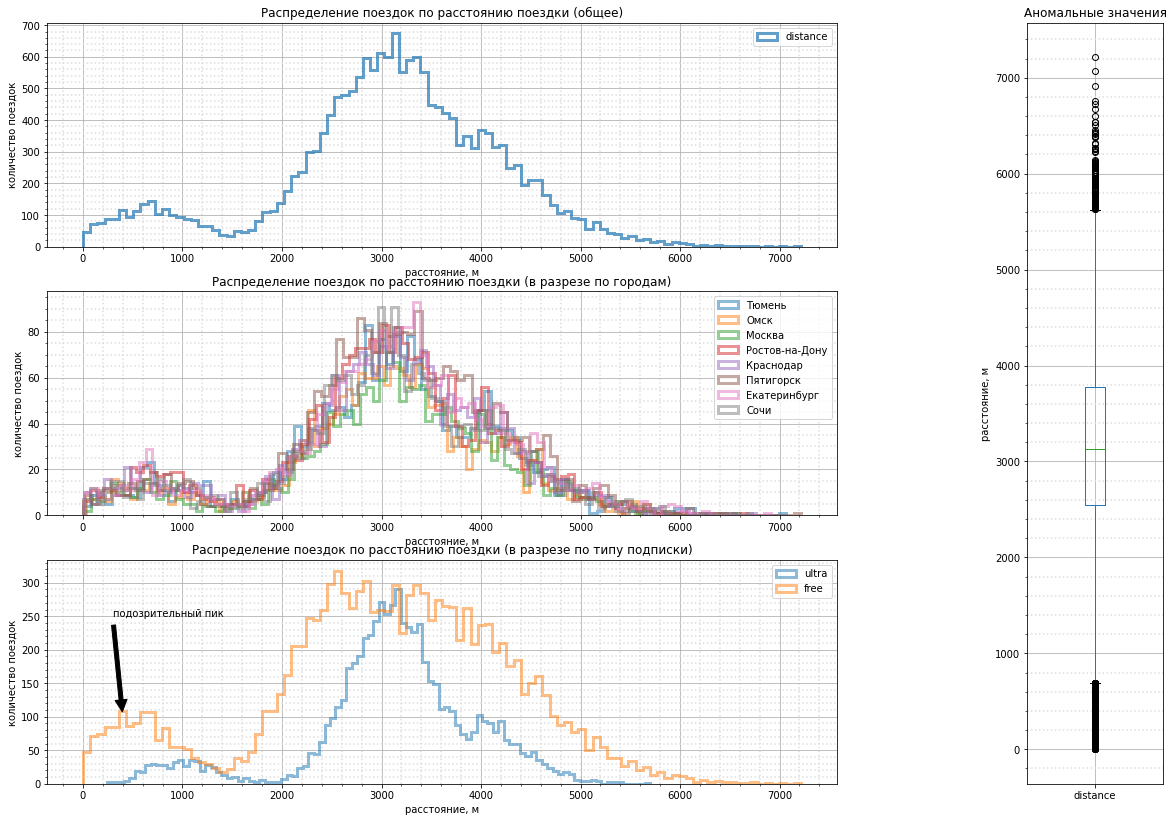

In [29]:
figure = plt.figure(figsize=(20, 14))
grid = GridSpec(3, 7)
figure.add_subplot(grid[0, 0:5])
figure.add_subplot(grid[1, 0:5])
figure.add_subplot(grid[:, 6])
figure.add_subplot(grid[2, 0:5])

ax = df.riders.distance.plot( kind='hist', histtype='step',
            linewidth=3, alpha=0.7, grid=True, bins=100, ax=figure.axes[0], legend = True,
            title='Распределение поездок по расстоянию поездки (общее)')
figure.axes[0].minorticks_on()
figure.axes[0].grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=1.5)
figure.axes[0].set_xlabel('расстояние, м')
figure.axes[0].set_ylabel('количество поездок')

for i in df.users.city.unique():
    df.riders[filtr['city_'+i]].distance.plot( kind='hist', histtype='step',
        linewidth=3, alpha=0.5, grid=True, bins=100, ax=figure.axes[1], legend = True,
        title='Распределение поездок по расстоянию поездки (в разрезе по городам)', label = i)
figure.axes[1].minorticks_on()
figure.axes[1].grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=1.5)    
figure.axes[1].set_xlabel('расстояние, м')
figure.axes[1].set_ylabel('количество поездок')
        
ax = df.riders.distance.plot(kind='box', title='Аномальные значения', grid=True, ax = figure.axes[2])
ax.minorticks_on()
ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=1.5)
figure.axes[2].set_ylabel('расстояние, м')

for i in df.users.subscription_type.unique():
    ax1 = df.riders[filtr['subscription_type_'+i]].distance.plot( kind='hist', histtype='step',
        linewidth=3, alpha=0.5, grid=True, bins=100, ax=figure.axes[3], legend = True,
        title='Распределение поездок по расстоянию поездки (в разрезе по типу подписки)', label = i)
figure.axes[3].minorticks_on()
figure.axes[3].grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=1.5)
figure.axes[3].set_xlabel('расстояние, м')
figure.axes[3].set_ylabel('количество поездок')
figure.axes[3].annotate("подозрительный пик", xy=(400, 100), xytext=(300, 250),
            arrowprops=dict(facecolor='black', shrink=0.05))

Бегло посмотрим характеристики распределений по расстоянию поездки для разных подписок:

In [30]:
for i in ['full', 'subscription_type_ultra', 'subscription_type_free']:
    display(f'Фильтр:{i} μ:{df.riders[filtr[i]].distance.mean():.0f} σ:{df.riders[filtr[i]].distance.std():.0f}')
    

'Фильтр:full μ:3071 σ:1117'

'Фильтр:subscription_type_ultra μ:3116 σ:837'

'Фильтр:subscription_type_free μ:3046 σ:1246'

На общем распределени видно 2 пика: основной в районе 3100 метров, второй, маленький, в районе 600 метров. Причем поведение пользователей в различных городах примерно одинаковое. Т.е. нельзя сказать, пик в районе 600 метров - влияние какого-то конкретного города. Тем ни менее, на фоне общего количества поездок маленький пик наполовину уходит в выбросы.
А вот тип подписки существенно влияет на распределение по пройденному расстоянию. Во первых, в бесплатном тарифе распределение более широкое (стандартное отклонение 1250 против 840), и в диапазоне растояний от 2.2 км до 4.0 имеется практически ровное плато. Во вторых, большинство сверхкоротких поездок осуществлены на бесплатном тарифе.

* **Во всех городах поведение пользователей одинаковое.**
* **Тип подписки существенно влияет на пройденное расстояние: пользователи на платном тарифе редко проезжают незначительные расстояния, и, судя по более узкому распределению, они чаще пользуются повторяющимися маршрутами.**
* **Пользователи с платной подпиской почти в два раза реже совершают поездки.**
* **В среднем, пользователи проезжают чуть более 3 км за поездку.**

Предположение: сверхкороткие поездки - первые поездки пользователей. Для проверки этого предположения придется сделать еще один фильтр:

In [31]:
filtr['is_first'] = df.riders.apply(lambda x:\
    df.riders[df.riders.user_id == x.user_id].sort_values('date').iloc[0].name == x.name, axis=1)


Сравним графики

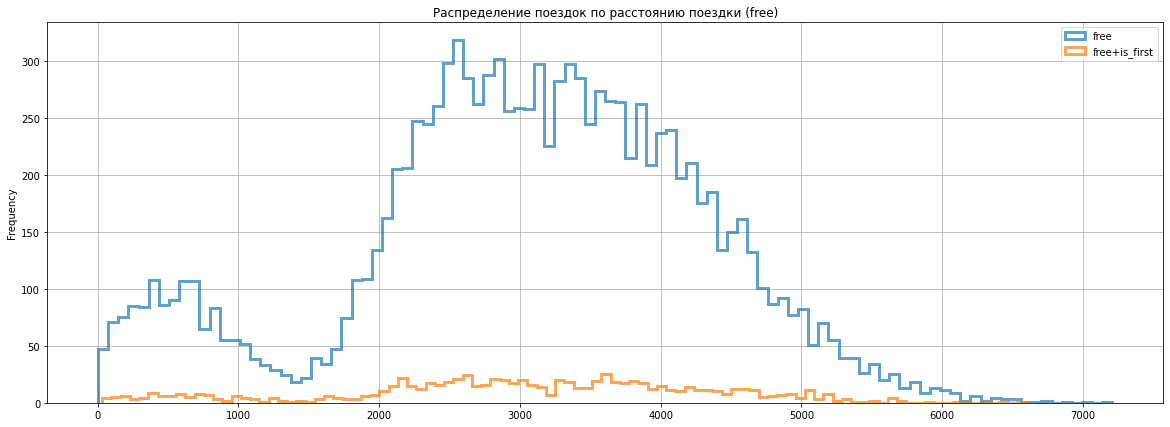

In [32]:
ax = df.riders[filtr['subscription_type_free']].distance.plot( kind='hist', histtype='step',
            linewidth=3, alpha=0.7, grid=True, bins=100, legend = True, label='free',
            title='Распределение поездок по расстоянию поездки (free)',figsize=(20, 7))

ax = df.riders[(filtr['subscription_type_free']) & (filtr['is_first'])].distance.plot( kind='hist', histtype='step',
            linewidth=3, alpha=0.7, grid=True, bins=100, legend = True, ax = ax, label = 'free+is_first')

Вывод: сверхкороткие поездки пользователей не  являются первыми поездками пользователей.

Предположение: слякоть в зимние месяцы приводит к увеличению сверхкоротких поездок. Можно проверить по месяцам, когда были совершены поездки:

In [33]:
df.riders[df.riders.distance < 1000].month.value_counts()

8     132
3     131
12    126
11    120
1     115
9     115
2     110
4     109
10    109
7     105
6     102
5      97
Name: month, dtype: int64

Нет, это не слякоть. Да и отображалась бы симметрично у пользователей с подпиской и без. Предположу, что это все-таки разряженые аккумуляторы сказываются. Еще есть предположение, что это поездки до ближайшей остановки или станции метро. Иногда люди очень сильно торопятся).

<a id='lab10'></a>
#### продолжительность поездок
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub> 

*Опишите и визуализируйте общую информацию о продолжительности поездок*

Фильтры остались с предыдущего задания, поэтому сразу смотрим распределения с различными срезами.

Text(0, 0.5, 'количество поездок')

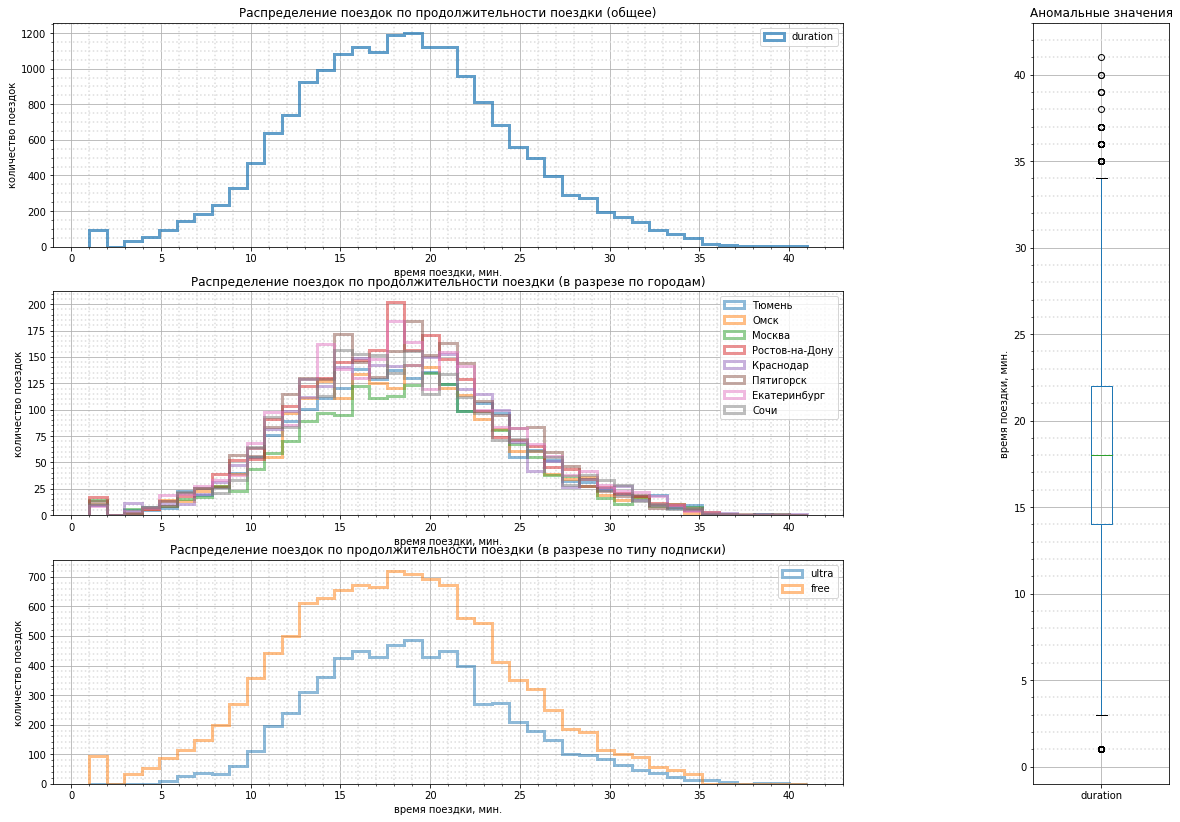

In [34]:
figure = plt.figure(figsize=(20, 14))
grid = GridSpec(3, 7)
figure.add_subplot(grid[0, 0:5])
figure.add_subplot(grid[1, 0:5])
figure.add_subplot(grid[:, 6])
figure.add_subplot(grid[2, 0:5])

ax = df.riders.duration.plot( kind='hist', histtype='step',
            linewidth=3, alpha=0.7, grid=True, bins=41, ax=figure.axes[0], legend = True,
            title='Распределение поездок по продолжительности поездки (общее)')
figure.axes[0].minorticks_on()
figure.axes[0].grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=1.5)
figure.axes[0].set_xlabel('время поездки, мин.')
figure.axes[0].set_ylabel('количество поездок')

for i in df.users.city.unique():
    df.riders[filtr['city_'+i]].duration.plot( kind='hist', histtype='step',
        linewidth=3, alpha=0.5, grid=True, bins=41, ax=figure.axes[1], legend = True, range=(1,41),
        title='Распределение поездок по продолжительности поездки (в разрезе по городам)', label = i)
figure.axes[1].minorticks_on()
figure.axes[1].grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=1.5)    
figure.axes[1].set_xlabel('время поездки, мин.')
figure.axes[1].set_ylabel('количество поездок')
        
ax = df.riders.duration.plot(kind='box', title='Аномальные значения', grid=True, ax = figure.axes[2])
ax.minorticks_on()
ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=1.5)
figure.axes[2].set_ylabel('время поездки, мин.')

for i in df.users.subscription_type.unique():
    ax1 = df.riders[filtr['subscription_type_'+i]].duration.plot( kind='hist', histtype='step',
        linewidth=3, alpha=0.5, grid=True, bins=41, ax=figure.axes[3], legend = True, range=(1,41),
        title='Распределение поездок по продолжительности поездки (в разрезе по типу подписки)', label = i)
figure.axes[3].minorticks_on()
figure.axes[3].grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=1.5)
figure.axes[3].set_xlabel('время поездки, мин.')
figure.axes[3].set_ylabel('количество поездок')

In [35]:
for i in ['full', 'subscription_type_ultra', 'subscription_type_free']:
    display(f'Фильтр:{i} μ:{df.riders[filtr[i]].duration.mean():.1f} σ:{df.riders[filtr[i]].duration.std():.1f}')

'Фильтр:full μ:18.3 σ:6.1'

'Фильтр:subscription_type_ultra μ:19.0 σ:5.6'

'Фильтр:subscription_type_free μ:17.9 σ:6.3'

In [36]:
df.riders[df.riders.duration < 3].distance.describe()

count      95.000000
mean     5113.705263
std       658.282677
min      4031.000000
25%      4612.000000
50%      5053.000000
75%      5489.000000
max      7212.000000
Name: distance, dtype: float64

In [37]:
df.riders[df.riders.duration < 3]

,user_id,distance,duration,date,month
6531,701,4197,1,2021-08-31,8
6570,704,4831,1,2021-10-14,10
6680,712,4685,1,2021-03-04,3
6695,713,5216,1,2021-02-25,2
6768,718,5198,1,2021-02-11,2
...,...,...,...,...,...
17004,1460,5532,1,2021-01-19,1
17242,1477,6725,1,2021-01-12,1
17314,1483,4446,1,2021-03-06,3
17505,1496,5723,1,2021-02-14,2


Удалить такие поездки плохо - они оплачены деньгами и матом. Но и статистику по расстоянию портить немного будут.

* **Средняя продолжительность поездки 18 минут.**
* **Каких либо отличий от города к городу, или от типа подписки не неблюдается.**

<a id='lab27'></a>
#### Предварительные итоги
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub> 

* Количество пользователей распределено по городам довольно равномерно, и находится в пределах от  169 до 219 пользователей.
* Соотношение пользователей с подпиской к общему количеству пользователей приблизительно равно во всех городах, и держится на уровне 46% с отклонениями в несколько процентов
* Возраст пользователей хорошо апроксимируется нормальным распределением со средним 24.9 лет и стандартным отклонением 4.6
* расстояние, которое пользователь преодолел за одну поездку:
   * Во всех городах поведение пользователей одинаковое.
   * Тип подписки существенно влияет на пройденное расстояние: пользователи на платном тарифе редко проезжают незначительные расстояния, и, судя по более узкому распределению, они чаще пользуются повторяющимися маршрутами.
   * Пользователи с платной подпиской почти в два раза реже совершают поездки.
   * В среднем, пользователи проезжают чуть более 3 км за поездку.
   * Предположение, что сверхкороткие поездки являются первыми поездками пользователей не подтвердилось.
* продолжительность поездок
   * Средняя продолжительность поездки 18 минут.
   * Каких либо отличий от города к городу, или от типа подписки не неблюдается.
   
<a id='lab11'></a>
### Объединение данных
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub> 
<a id='lab12'></a>
#### Объединение данные о пользователях, поездках и подписках в один датафрейм
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub> 

*Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().*

In [38]:
df['full'] = df.riders.merge(df.users, on='user_id').merge(df.subscriptions, on='subscription_type')
df.full.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4410,26,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2618,16,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,755,7,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2695,19,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4029,27,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [39]:
len(df.riders) == len(df.full)

True

<a id='lab13'></a>
#### Разделение данных на два датафрейма на пользователей с подпиской и без
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub> 

*Создайте ещё два датафрейма из датафрейма, созданного на предыдущем этапе:*
* *c данными о пользователях без подписки;*
* *с данными о пользователях с подпиской.*


In [40]:
df['ultra'] = df.full[filtr['subscription_type_ultra']]
df['free'] = df.full[filtr['subscription_type_free']]

df.ultra.subscription_type.value_counts()

ultra    6500
Name: subscription_type, dtype: int64

In [41]:
df.free.subscription_type.value_counts()

free    11568
Name: subscription_type, dtype: int64

<a id='lab14'></a>
#### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий.
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub>  

*Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.*

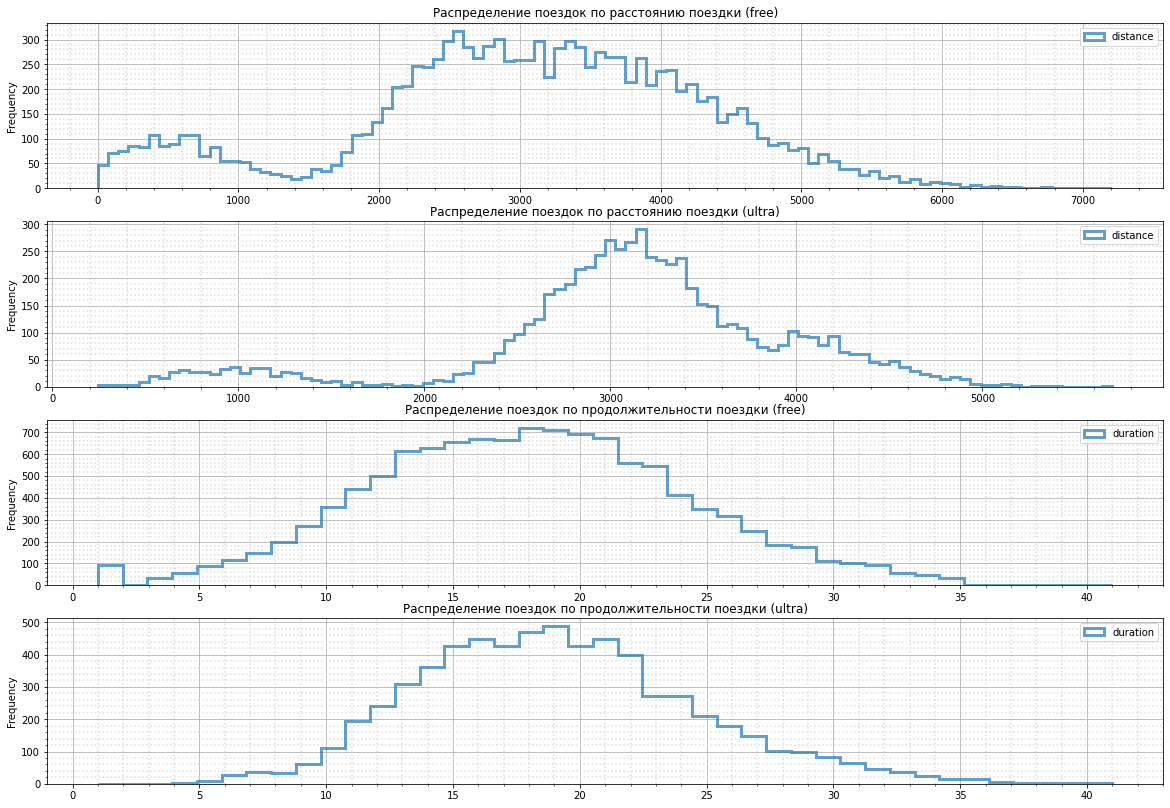

In [42]:
# figure = plt.figure(figsize=(20, 14))
# grid = GridSpec(4, 1)
# figure.add_subplot(grid[0, :])
# figure.add_subplot(grid[1, :])
# figure.add_subplot(grid[2, :])
# figure.add_subplot(grid[3, :])

# ax = df.free.distance.plot( kind='hist', histtype='step',
#             linewidth=3, alpha=0.7, grid=True, bins=100, ax=figure.axes[0], legend = True,
#             title='Распределение поездок по расстоянию поездки (free)')
# figure.axes[0].minorticks_on()
# figure.axes[0].grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=1.5)

# ax = df.ultra.distance.plot( kind='hist', histtype='step',
#             linewidth=3, alpha=0.7, grid=True, bins=100, ax=figure.axes[1], legend = True,
#             title='Распределение поездок по расстоянию поездки (ultra)')
# figure.axes[1].minorticks_on()
# figure.axes[1].grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=1.5)

# ax = df.free.duration.plot( kind='hist', histtype='step',
#     linewidth=3, alpha=0.7, grid=True, bins=41, ax=figure.axes[2], legend = True, range=(1,41),
#     title='Распределение поездок по продолжительности поездки (free)')
# figure.axes[2].minorticks_on()
# figure.axes[2].grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=1.5)

# ax = df.ultra.duration.plot( kind='hist', histtype='step',
#     linewidth=3, alpha=0.7, grid=True, bins=41, ax=figure.axes[3], legend = True, range=(1,41),
#     title='Распределение поездок по продолжительности поездки (ultra)')
# figure.axes[3].minorticks_on()
# figure.axes[3].grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=1.5)


Text(0, 0.5, 'количество поездок')

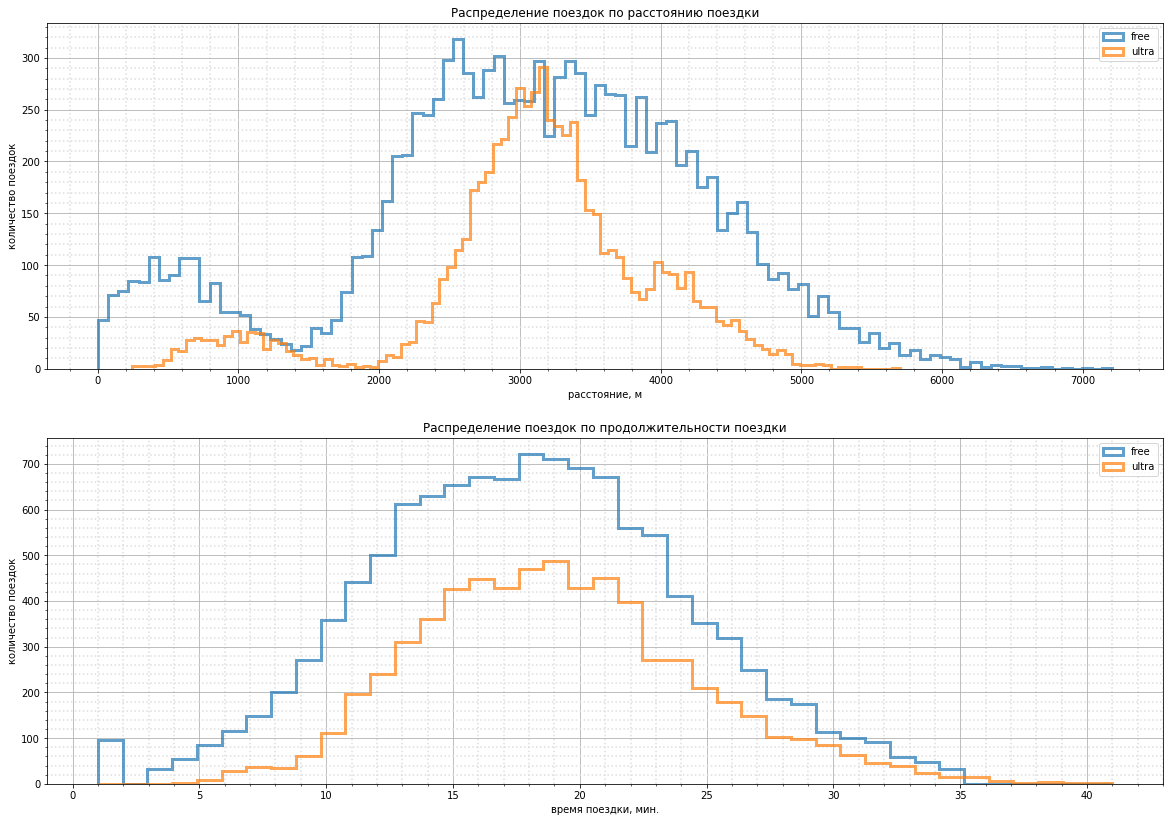

In [43]:
figure = plt.figure(figsize=(20, 14))
grid = GridSpec(2, 1)
figure.add_subplot(grid[0, :])
figure.add_subplot(grid[1, :])

ax = df.free.distance.plot( kind='hist', histtype='step',
            linewidth=3, alpha=0.7, grid=True, bins=100, ax=figure.axes[0], legend = True,
            title='Распределение поездок по расстоянию поездки', label='free')
figure.axes[0].minorticks_on()
figure.axes[0].grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=1.5)
figure.axes[0].set_xlabel('расстояние, м')


ax = df.ultra.distance.plot( kind='hist', histtype='step',
            linewidth=3, alpha=0.7, grid=True, bins=100, ax=figure.axes[0], legend = True,
            label='ultra')
figure.axes[0].set_ylabel('количество поездок')

ax = df.free.duration.plot( kind='hist', histtype='step',
    linewidth=3, alpha=0.7, grid=True, bins=41, ax=figure.axes[1], legend = True, range=(1,41),
    title='Распределение поездок по продолжительности поездки', label='free')
figure.axes[1].minorticks_on()
figure.axes[1].grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=1.5)
figure.axes[1].set_xlabel('время поездки, мин.')

ax = df.ultra.duration.plot( kind='hist', histtype='step',
    linewidth=3, alpha=0.7, grid=True, bins=41, ax=figure.axes[1], legend = True, range=(1,41),
    label='ultra')
figure.axes[1].set_ylabel('количество поездок')


Ну, собственно, получили копию графиков из пункта "Исследовательский анализ данных", только в менее наглядном виде.

<a id='lab28'></a>
#### Предварительные итоги
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub> 

Видимо это тестовое задание. На данных такого маленького объема можно комфортно работать как в разных таблицах, так и в одной. Для больших выборок требуется оптимизация структуры для ускорения расчетов.

<a id='lab15'></a>
### Подсчет выручки
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub> 
<a id='lab16'></a>
#### Создание сводной таблицы по пользователям
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub> 

*Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.*

Для начала удостоверимся, что все даты лежат в пределах одного года (иначе месяцы надо учитывать с учетом года):

In [44]:
df.full.date.describe(datetime_is_numeric=True)

count                            18068
mean     2021-06-30 19:47:21.266327296
min                2021-01-01 00:00:00
25%                2021-04-02 00:00:00
50%                2021-06-30 00:00:00
75%                2021-09-28 00:00:00
max                2021-12-30 00:00:00
Name: date, dtype: object

Да, все в пределах года. Создадим сводную таблицу: 

In [45]:
df['pivot_table'] = df.full.pivot_table(index=['user_id', 'month'], values=['distance', 'duration'],
    aggfunc=['sum', 'count'])
df.pivot_table.columns = ['sum_distance', 'sum_duration', 'count', 'revenue'] # сразу резервирую столбец под выручку
df.pivot_table.iloc[:,:3]

sum_distance  sum_duration  count
user_id month                                   
1       1              7028            42      2
        4               755             7      1
        8              6724            46      2
        10             5811            32      2
        11             7005            56      3
...                     ...           ...    ...
1534    6              3411            26      2
        8              7623            48      2
        9              4929            23      1
        11            13353            78      4
        12             2372            16      1

[11331 rows x 3 columns]

<a id='lab17'></a>
#### Добавление помесячной выручки в сводную таблицу
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub> 

*В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.*

Округление указанным способом было произведено на стадии предобработки.

In [46]:
def get_the_revenue_value(row):
    into_full = df.full[df.full.user_id == row.name[0]].iloc[0]
    return (into_full.subscription_fee + row['count'] * into_full.start_ride_price +
        row.sum_duration * into_full.minute_price)

df.pivot_table.revenue = df.pivot_table.apply(get_the_revenue_value, axis=1)

df.pivot_table

sum_distance  sum_duration  count  revenue
user_id month                                            
1       1              7028            42      2      451
        4               755             7      1      241
        8              6724            46      2      475
        10             5811            32      2      391
        11             7005            56      3      535
...                     ...           ...    ...      ...
1534    6              3411            26      2      308
        8              7623            48      2      484
        9              4929            23      1      234
        11            13353            78      4      824
        12             2372            16      1      178

[11331 rows x 4 columns]

<a id='lab29'></a>
#### Предварительные итоги
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub> 

Была создана сводная таблица с помесячной выручкой, которую принес каждый пользователь

<a id='lab18'></a>
### Проверка гипотез
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub> 
<a id='lab19'></a>
#### Гипотеза: пользователи с подпиской тратят больше времени на поездки
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub> 

*Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.*

H0: пользователи с подпиской тратят на поездки столько же времени, как и  пользователи без подписки.  
H1: пользователи с подпиской тратят на поездки больше времени, чем пользователи без подписки.

Нам доступна генеральная совокупность. Посмотрим параметры распределений:

In [47]:
param={}
for i in ['full', 'subscription_type_ultra', 'subscription_type_free']:
    param[i] = {'μ': df.full[filtr[i]].duration.mean(), 'σ': df.full[filtr[i]].duration.std()}

param

{'full': {'μ': 18.30352003542174, 'σ': 6.094927629492689},
 'subscription_type_ultra': {'μ': 19.037692307692307, 'σ': 5.577439076125051},
 'subscription_type_free': {'μ': 17.890992392807746, 'σ': 6.330249759835795}}

In [48]:
delta_t = (param['subscription_type_ultra']['μ'] - param['subscription_type_free']['μ'])*60
f"Среднее время поездки пользователей с подпиской больше на {delta_t:.0f} секунд"

'Среднее время поездки пользователей с подпиской больше на 69 секунд'

In [49]:
results = stats.ttest_ind(df.full[filtr['subscription_type_ultra']].duration,
    df.full[filtr['subscription_type_free']].duration, equal_var=False, alternative='greater')
#f'p-value: {results.pvalue:.1%}'


'p-value: 0.0%'

In [50]:
results.pvalue

1.1814679253701353e-36

* **Есть основания говорить, что пользователи с подпиской тратят в сервисе больше денег.**
* **Среднее значение времени поездки у пользователей с подпиской больше среднего времени поездки пользователей без подписки приблизительно на 70 секунд.**

<a id='lab20'></a>
#### Гипотеза: пользователи с подпиской проезжают в среднем не больше 3130 метров
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub> 

*Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.*

H0: Пользователи с подпиской проезжают в среднем 3130 метров.  
H1: Пользователи с подпиской проезжают в среднем больше 3130 метров.

In [51]:
param={}
for i in ['full', 'subscription_type_ultra', 'subscription_type_free']:
    param[i] = {'μ': df.full[filtr[i]].distance.mean(), 'σ': df.full[filtr[i]].distance.std()}

param

{'full': {'μ': 3071.1598406021694, 'σ': 1116.8315479031664},
 'subscription_type_ultra': {'μ': 3115.949230769231, 'σ': 836.8948381888428},
 'subscription_type_free': {'μ': 3045.9929114799447, 'σ': 1246.174341027526}}

In [53]:
results = stats.ttest_1samp(df.full[filtr['subscription_type_ultra']].distance, 3130, alternative='greater')
f'p-value: {results.pvalue:.1%}'

'p-value: 91.2%'

**Пользователи с подпиской в среднем проезжают 3130 метров.**

<a id='lab21'></a>
#### Гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub> 

*Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.*

Создадим новую сводную таблицу с дополнительными столбцами: id пользователя, месяц и тип подписки

In [54]:
df['pivot_table_2'] = df.pivot_table.copy()
df.pivot_table_2 = df.pivot_table_2.reset_index()
df.pivot_table_2['subscription_type'] = df.pivot_table_2.apply(lambda x:
    df.full[df.full.user_id == x.user_id].iloc[0].subscription_type, axis=1)
df.pivot_table_2

,user_id,month,sum_distance,sum_duration,count,revenue,subscription_type
0,1,1,7028,42,2,451,ultra
1,1,4,755,7,1,241,ultra
2,1,8,6724,46,2,475,ultra
3,1,10,5811,32,2,391,ultra
4,1,11,7005,56,3,535,ultra
...,...,...,...,...,...,...,...
11326,1534,6,3411,26,2,308,free
11327,1534,8,7623,48,2,484,free
11328,1534,9,4929,23,1,234,free
11329,1534,11,13353,78,4,824,free


Создадим фильтры для сводной таблицы для пользователей с подпиской и без:

In [55]:
filtr['pv_ultra'] = df.pivot_table_2.subscription_type == 'ultra'
filtr['pv_free'] = df.pivot_table_2.subscription_type == 'free'

# быстрая самопроверка, что фильтры отрабатывают
for i in ['pv_ultra', 'pv_free']: display(f'{i}: count:{filtr[i].sum()} выручка_μ:\
{df.pivot_table_2[filtr[i]].revenue.mean():.2f} выручка_σ:{df.pivot_table_2[filtr[i]].revenue.std():.2f}')

'pv_ultra: count:4533 выручка_μ:362.79 выручка_σ:88.26'

'pv_free: count:6798 выручка_μ:328.64 выручка_σ:183.87'

Выдвинем гипотезы:  
H0: выручка за месяц от пользователей с подпиской равна выручке за месяц от пользователей без подписки  
H1: выручка за месяц от пользователей с подпиской больше выручке за месяц от пользователей без подписки

In [56]:
def hypothesis_3(month):
    results = stats.ttest_ind(df.pivot_table_2[filtr['pv_ultra']].revenue,
    df.pivot_table_2[filtr['pv_free']].revenue, equal_var=False, alternative='greater')
    return round(results.pvalue,4)

[hypothesis_3(i) for i in range(1,13)]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [57]:
stats.ttest_ind(df.pivot_table_2[filtr['pv_ultra']].revenue,
    df.pivot_table_2[filtr['pv_free']].revenue, equal_var=False, alternative='greater').pvalue

8.874140893976874e-40

**Есть основания говорить, что выручка за месяц от пользователей с подпиской выше выручки от пользователей без подписки**

Визуализируем среднюю выручку по месяцам и тарифам:

In [58]:
df['pivot_table_3'] = df.pivot_table_2.pivot_table(index = ['subscription_type','month'], values = 'revenue',
    aggfunc=['mean','std'])
df.pivot_table_3.columns = ['mean', 'std']

df.pivot_table_3.applymap(lambda x: f'{x:.2f}' if type(x) == float else x).T

subscription_type    free                                                  \
month                  1       2       3       4       5       6       7    
mean               323.08  313.53  336.72  335.62  328.15  326.22  329.25   
std                186.08  186.53  185.80  184.11  185.25  182.85  186.75   

subscription_type                                           ultra          \
month                  8       9       10      11      12      1       2    
mean               331.18  335.70  330.47  322.66  330.60  369.51  351.90   
std                190.79  176.29  179.73  171.45  190.05   90.38   72.91   

subscription_type                                                          \
month                  3       4       5       6       7       8       9    
mean               360.12  367.16  368.48  361.39  367.86  360.77  364.33   
std                 94.46   88.75   97.27   84.94   91.68   83.32   85.25   

subscription_type                          
month                  10      11      12  
mean               360.03  357.47  363.01  
std                 95.90   79.16   89.26

Text(0, 0.5, 'Средняя выручка с пользователя, руб')

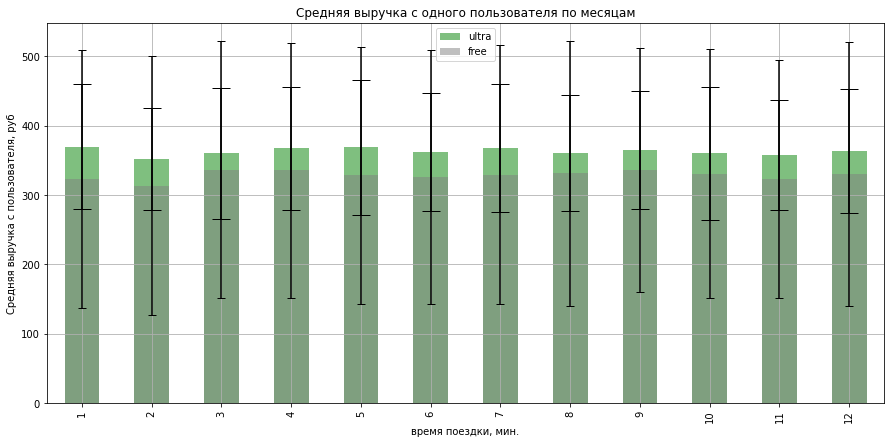

In [59]:
ax = df.pivot_table_3.loc['ultra'].plot(kind='bar', y='mean', yerr='std', linewidth=3, alpha=0.5, grid=True,
        legend = True, label = 'ultra', color='green', capsize=9, figsize=(15, 7))
ax = df.pivot_table_3.loc['free'].plot( kind='bar', y='mean', yerr='std', linewidth=3, alpha=0.5, grid=True,
        title='Средняя выручка с одного пользователя по месяцам', label = 'free', ax = ax, color='grey', capsize=4)
ax.set_xlabel('время поездки, мин.')
ax.set_ylabel('Средняя выручка с пользователя, руб')

Тут доверительный интервал с короткими рисками - пользователи free тарифа, с длинными рисками - пользователи ultra тарифа.

<a id='lab22'></a>
#### Снижение количества обращений в техподдержку при потенциальном обновлении сервера
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub>  

*Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?*

Для проверки этой гипотезы следует воспользоваться методом stats.ttest_rel(before, after)

<a id='lab30'></a>
#### Предварительные итоги
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub>

* Гипотеза: пользователи с подпиской тратят больше времени на поездки
   * Есть основания говорить, что пользователи с подпиской тратят в сервисе больше денег.
   * Среднее значение времени поездки у пользователей с подпиской больше среднего времени поездки пользователей без подписки приблизительно на 70 секунд.
* Гипотеза: пользователи с подпиской проезжают в среднем не больше 3130 метров
   * Пользователи с подпиской в среднем проезжают 3130 метров.
   * расстояние, которое проезжают пользователи, больше оптимального с точки зрения износа самоката, но незначительно.
* Гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки
   * Для всех месяцев есть основания говорить, что выручка за месяц от пользователей с подпиской выше выручки от пользователей без подписки
   * Имеет смысл пробовать перевести на тариф с подпиской большее количество пользователей
* Снижение количества обращений в техподдержку при потенциальном обновлении сервера
   * Для проверки этой гипотезы следует воспользоваться методом stats.ttest_rel(before, after), но для этого нужны данные по количеству обращений как до, так и после обновления.
   
<a id='lab23'></a>
### Распределения
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub>

<a id='lab24'></a>
#### Акция с промокодами
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub>

*Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соотвествующий платёж.*

*Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.*

Задача решается использоваением биноминального распределения. Посмотрим, можн ли его апроксимировать нормальным:
Параметры биноминального распределения в этой задаче: μ=100, σ=(μ\*(1-0.1))\*\*(0.5), n=μ/0.1
Условия корректной апроксимации биноминальным распределением: диапазон \[μ-3\*σ, μ+3\*σ\] является поддиапазоном  \[0, n\]

In [60]:
n=1000
mu=n*0.1
sigma = (mu*(1-0.1))**(0.5)
mu-3*sigma, mu+3*sigma

(71.53950105848459, 128.46049894151543)

Можно использовать апроксимацию нормальным распределением.  
Сделаем предварительную прикидку, затем пошагово будем проверять значения, для получения более точного результата:

In [61]:
def cdf(n, alpha, limit):
    mu = n * alpha
    sigma = (mu * (1-alpha))**(0.5)
    return stats.norm(mu,sigma).cdf(limit)

def ppf(n, alpha, limit):
    mu = n * alpha
    sigma = (mu * (1-alpha))**(0.5)
    return int(math.ceil(stats.norm(mu,sigma).ppf(limit)/alpha))
    
for n in range(ppf(1000,0.1,0.95),2000):
    if cdf(n, 0.1, 100) < 0.05: break
n - 1

1168

**Количество промокодов должно быть больше 1168.**  
Визуализируем результат:

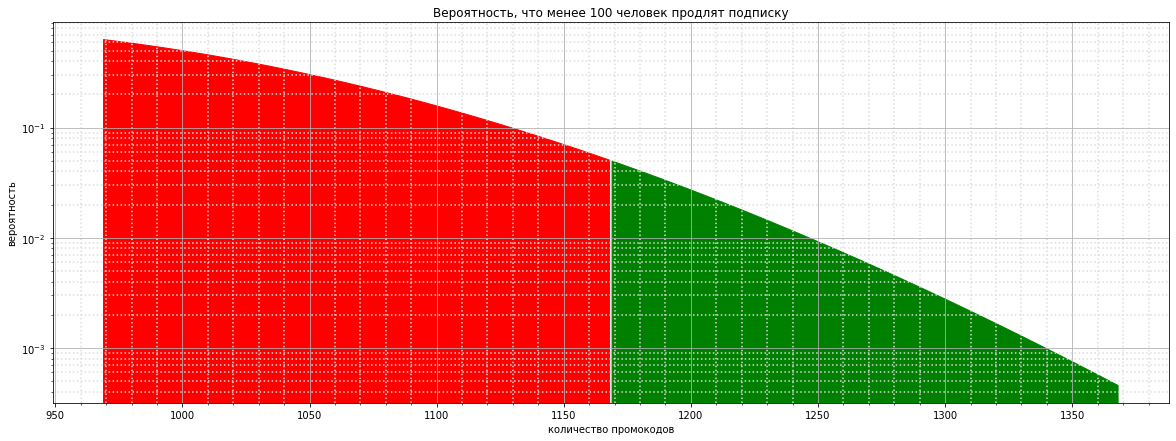

In [62]:
df['promo']=pd.DataFrame({'x':[i for i in range(n-200,n+200)]})
df.promo['y']=df.promo.x.apply(lambda n: cdf(n, 0.1, 100))

plt.figure(figsize=(20, 7))
ax = plt.fill_between(df.promo.x, df.promo.y, where=df.promo.y>0.05, color='r')
plt.xlabel("количество промокодов")
plt.ylabel("вероятность")
plt.title('Вероятность, что менее 100 человек продлят подписку')
plt.fill_between(df.promo.x, df.promo.y, where=df.promo.y<=0.05, color='g')
plt.yscale('log')
plt.grid()
plt.minorticks_on()
plt.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=1.5)

<a id='lab25'></a>
#### Акция с push-уведомлениями
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub>

*Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.*

Аналогично, сначала проверим, что биноминальное распределение можно апроксимировать нормальным:

In [63]:
n = 1e6
alpha = 0.4
mu = n * alpha
sigma = (mu*(1-0.1))**(0.5)
mu-3*sigma, mu+3*sigma

(398200.0, 401800.0)

In [64]:
f'Вероятность: {cdf(1e6, 0.4, 399.5e3):.1%}'

'Вероятность: 15.4%'

Визуализируем резуьтат:

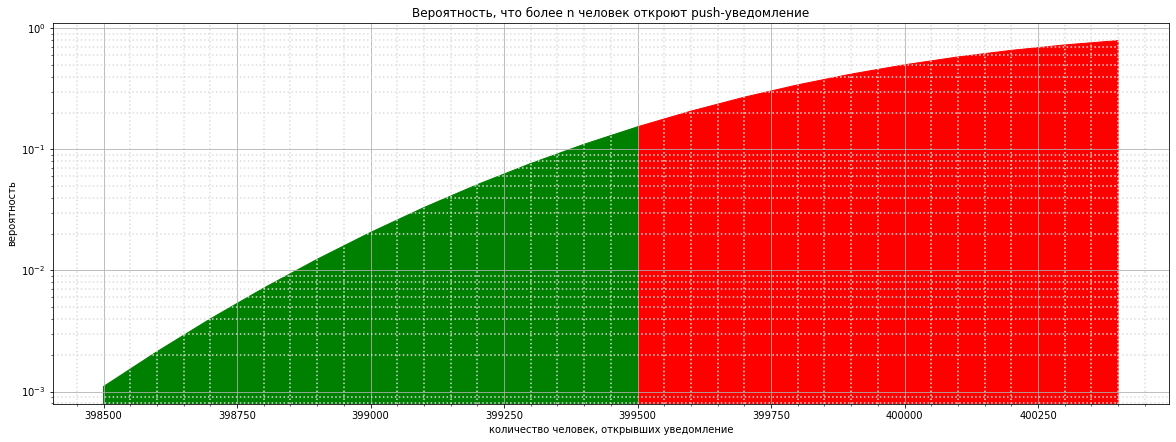

In [65]:
n = 399500

df['push']=pd.DataFrame({'x':[i for i in range(n - 1000, n + 1000, 100)]})
df.push['y']=df.push.x.apply(lambda n: cdf(1e6, 0.4, n))

plt.figure(figsize=(20, 7))
ax = plt.fill_between(df.push.x, df.push.y, where=df.push.x>=399500, color='r')
plt.xlabel("количество человек, открывших уведомление")
plt.ylabel("вероятность")
plt.title('Вероятность, что более n человек откроют push-уведомление')
plt.fill_between(df.push.x, df.push.y, where=df.push.x<=399500, color='g')
plt.yscale('log')
plt.grid()
plt.minorticks_on()
plt.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=1.5)

**Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей составляет 15.4%**

<a id='lab31'></a>
#### Предварительные итоги
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub>

* Акция с промокодами
   * минимальное количество промокодов, которое нужно разослать, чтобы вероятность не выполнить план была примерно 5 %, равно 1169 штукам.
* Акция с push-уведомлениями
   * вероятность того, что уведомление откроют не более 399.5 тыс. пользователей, равна 15.4%
   
<a id='lab32'></a>
### Общие итоги
<sub> &nbsp; &nbsp; &nbsp;[к плану работ](#lab001)</sub>

* Была проведена предобработка данных
   * Пропусков в данных не было.
   * Для 2 столбцов был изменен тип данных.
   * Был создан новый столбец с номером месяца
   * Была устранена 31 строка с явными дубликатами.
   * В значимых столбцах неявных дубликатов не обнаружено.
   * Есть неявные дубликаты в столбце с именами пользователей, но это поле не значимо для текущего исследования.
   * За исследуемый период пользователи не меняли тип подписки
* Результаты исследовательской части:
   * Количество пользователей распределено по городам довольно равномерно, и находится в пределах от  169 до 219 пользователей.
   * Соотношение пользователей с подпиской к общему количеству пользователей приблизительно равно во всех городах, и держится на уровне 46% с отклонениями в несколько процентов
   * Возраст пользователей хорошо апроксимируется нормальным распределением со средним 24.9 лет и стандартным отклонением 4.6
   * расстояние, которое пользователь преодолел за одну поездку:
      * Во всех городах поведение пользователей одинаковое.
      * Тип подписки существенно влияет на пройденное расстояние: пользователи на платном тарифе редко проезжают незначительные расстояния, и, судя по более узкому распределению, они чаще пользуются повторяющимися маршрутами.
      * Пользователи с платной подпиской почти в два раза реже совершают поездки.
      * В среднем, пользователи проезжают чуть более 3 км за поездку.
      * Предположение, что сверхкороткие поездки являются первыми поездками пользователей не подтвердилось.
   * продолжительность поездок
      * Средняя продолжительность поездки 18 минут.
      * Каких либо отличий от города к городу, или от типа подписки не неблюдается.
* Объединение данных
   * Видимо это тестовое задание. На данных такого маленького объема можно комфортно работать как в разных таблицах, так и в одной. Для больших выборок требуется оптимизация структуры для ускорения расчетов.
* Подсчет выручки
   * Была создана сводная таблица с помесячной выручкой, которую принес каждый пользователь.
* Проверка гипотез
   * Гипотеза: пользователи с подпиской тратят больше времени на поездки
      * Есть основания говорить, что пользователи с подпиской тратят в сервисе больше денег.
      * Среднее значение времени поездки у пользователей с подпиской больше среднего времени поездки пользователей без подписки приблизительно на 70 секунд.
   * Гипотеза: пользователи с подпиской проезжают в среднем не больше 3130 метров
      * пользователи с подпиской в среднем проезжают 3130 метров.
      * расстояние, которое проезжают пользователи, больше оптимального с точки зрения износа самоката, но незначительно.
   * Гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки
      * Для всех месяцев есть основания говорить, что выручка за месяц от пользователей с подпиской выше выручки от пользователей без подписки
      * Имеет смысл пробовать перевести на тариф с подпиской большее количество пользователей
   * Снижение количества обращений в техподдержку при потенциальном обновлении сервера
      * Для проверки этой гипотезы следует воспользоваться методом stats.ttest_rel(before, after), но для этого нужны данные по количеству обращений как до, так и после обновления.
* Анализ распределений
   * Акция с промокодами
      * минимальное количество промокодов, которое нужно разослать, чтобы вероятность не выполнить план была примерно 5 %, равно 1169 штукам.
   * Акция с push-уведомлениями
      * вероятность того, что уведомление откроют не более 399.5 тыс. пользователей, равна 15.4%
